Make a simple plot of radio luminosity vs blueshift for our own sake.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.cosmology import FlatLambdaCDM

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def radluminosity(nu1, nu2, S, alpha, z):
    #calculate luminosity at nu1 based on flux at nu2
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L = ((4*np.pi*DL**2*(S*1e-23*1e-6)) / ((1+z)**(1+alpha))) * (nu1/nu2)**alpha * 1e-7
    return np.log10(L)

In [3]:
vla = pd.read_csv("SpringFinalFigs_moreParams.csv")
vla.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,ICA_CIV_EQW,ICA_CIV_EQW_new2021,RM_DIST_UNSCALE,RM_DIST_SCALE,CIV_BLUESHIFT_SCALED,CIV_EQW_SCALED,CIVBestfit_Index,L3GHz [W/Hz],CIV_DIST_021721,CIV_DIST_041921
0,0,0,0,0,0,0,0,0,0,0,...,101.160257,35.900650,1728.413701,3.486256,0.722760,-0.879689,275801.0,24.469498,3.506315,2.792875
1,1,1,1,1,1,1,1,1,1,1,...,95.079534,33.912371,414.691980,2.589969,-0.319656,-0.943523,238121.0,24.841584,2.618358,2.230519
2,2,2,2,2,2,2,2,2,2,2,...,97.289514,34.648832,646.782974,2.704445,-0.134167,-0.920323,244881.0,23.606351,2.734290,2.304035
3,3,3,3,3,3,3,3,3,3,3,...,122.740901,43.720855,796.239578,2.635625,-0.014596,-0.653142,240918.0,23.761645,2.685961,2.164442
4,4,4,4,4,4,4,4,4,4,4,...,102.881571,36.524054,1490.190560,3.289717,0.534205,-0.861619,269740.0,23.545828,3.312861,2.652129


In [4]:
ew_vla   = vla[["ICA_CIV_EQW_new2021"]].values.flatten()
voff_vla = vla[["ICA_CIV_BLUESHIFT"]].values.flatten()

z_vla = vla[["redshift_1"]].values.flatten()
S3 = vla[["int_flux"]].values.flatten()
L14_vla = radluminosity(1.4, 3., S3, -0.7, z_vla)
det_vla = (vla[["detection"]].values.flatten()==1)
D_vla = vla[["detection"]].values.flatten() + vla[['FIRST']].values.astype("int").flatten()
Mi_vla = vla[["MI_Z2_1"]].values.flatten()

#Eq 4 from QLF paper Richards+2006; subtract 7 to convert erg/s to Watts
d = 3.08e19 # 10pc in cm
logL2500_vla = -0.4 * (Mi_vla + 48.6 + 2.5*np.log10(1.+2.)) + np.log10(4.*np.pi*d**2.) - 7.

R_vla = (10.**L14_vla)/(10.**logL2500_vla)
logR_vla = np.log10(R_vla)

RL_vla = (logR_vla>1)

In [5]:
lofar = pd.read_csv("LOFAR/LOFAR_from8403colorselected_all388_CIV.csv")
lofar.sort_values("name", inplace=True)
GOOD = lofar[["good"]].values.flatten()
lofar_det = pd.read_csv("LOFAR/LOFAR_from8403colorselected_detections123_1arcsec.csv")
lofar_det.sort_values("name", inplace=True)
lofar_det.head()

,col1,name,RA_1,Dec_1,Source_Name,RA_2,E_RA,E_RA_tot,DEC_2,E_DEC,...,E_DC_Min,PA,E_PA,DC_PA,E_DC_PA,Isl_rms,S_Code,Mosaic_ID,Isl_id,Separation
15,2206,105245.64+463831.2,163.190206,46.642011,ILTJ105245.70+463830.7,163.190427,0.362932,0.375567,46.641878,0.244608,...,0.540513,106.081950,17.744264,106.081950,17.744264,0.066047,S,P3Hetdex16,5113,0.727160
3,1830,110039.04+510902.3,165.162686,51.150642,ILTJ110039.05+510902.2,165.162688,0.136256,0.156984,51.150616,0.144476,...,0.317960,20.380242,55.903120,20.380242,55.903120,0.067429,S,P4Hetdex16,2296,0.093947
16,2208,110429.51+481637.7,166.122993,48.277147,ILTJ110429.52+481638.0,166.123006,0.435098,0.477744,48.277241,0.259278,...,0.608496,93.276007,21.126713,0.000000,21.126713,0.054989,S,P6,2649,0.341448
4,1832,110853.98+522337.9,167.224924,52.393875,ILTJ110853.96+522337.6,167.224854,0.486835,0.516670,52.393796,0.299093,...,0.700402,84.536970,24.364421,0.000000,24.364421,0.075898,S,P8Hetdex,4605,0.324757
116,8286,111026.20+502403.6,167.609208,50.401021,ILTJ111026.21+502403.8,167.609224,0.490326,0.528534,50.401070,0.292486,...,0.683511,96.225524,27.350117,0.000000,27.350117,0.062552,S,P6,734,0.181365


In [6]:
#Create a mask for all detections
name = lofar[["name"]].values.flatten() #can use this to pick out detections from Amy's file
name_det = lofar_det[["name"]].values.flatten()
D_lofar = np.array([])
for i in range(len(name)):
    if (name[i]==name_det).any():
        D_lofar = np.append(D_lofar, True)
    else:
        D_lofar = np.append(D_lofar, False)

det_lofar = (D_lofar==1.)

In [7]:
S144 = 210.*np.ones(len(lofar)) #initialize all objects to non-detections
S144[det_lofar] = lofar_det[["Total_flux"]].values.flatten() * 1.e3
z_lofar = lofar[["z_paul"]].values.flatten()
L14_lofar = radluminosity(1.4, 0.144, S144, -0.7, z_lofar)
ew_lofar = lofar[["CIV_EW"]].values.flatten()
voff_lofar = lofar[["CIV_blue"]].values.flatten()
good = (GOOD&(ew_lofar<120)) #don't want to include obj far from distribution in CIV distance calculation
Mi_lofar = lofar[["MI_Z2"]].values.flatten()

#Eq 4 from QLF paper Richards+2006; subtract 7 to convert erg/s to Watts
d = 3.08e19 # 10pc in cm
logL2500_lofar = -0.4 * (Mi_lofar + 48.6 + 2.5*np.log10(1.+2.)) + np.log10(4.*np.pi*d**2.) - 7.

R_lofar = (10.**L14_lofar)/(10.**logL2500_lofar)
logR_lofar = np.log10(R_lofar)

RL_lofar = (logR_lofar>1)

In [8]:
voff = np.concatenate((voff_vla, voff_lofar))
ew   = np.concatenate((ew_vla, ew_lofar))
L14  = np.concatenate((L14_vla, L14_lofar))
RQ   = np.concatenate((~RL_vla, ~RL_lofar))
det  = np.concatenate((det_vla, det_lofar))

Let's first just see the most basic plot possible: all sources together.

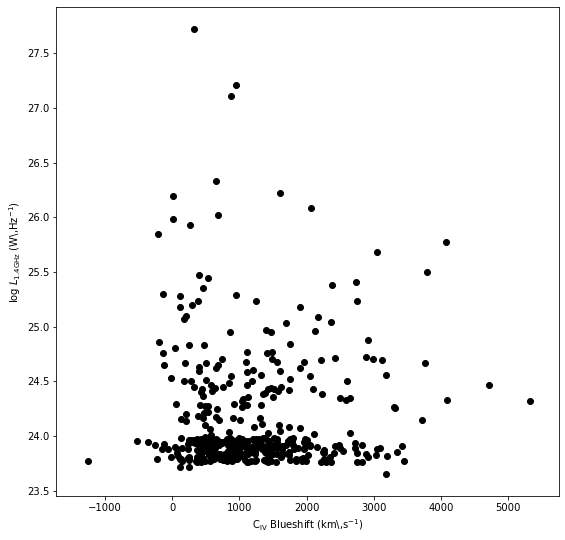

In [9]:
fig = plt.figure(figsize=(9,9))

plt.scatter(voff, L14, color="k")
plt.ylabel("log $L_\mathrm{1.4GHz}$ (W\,Hz$^{-1}$)")
plt.xlabel("C$_\mathrm{IV}$ Blueshift (km\,s$^{-1}$)")
plt.xlim(-1725, plt.gca().get_xlim()[1])
plt.show()

Any difference between LOFAR/VLA data?

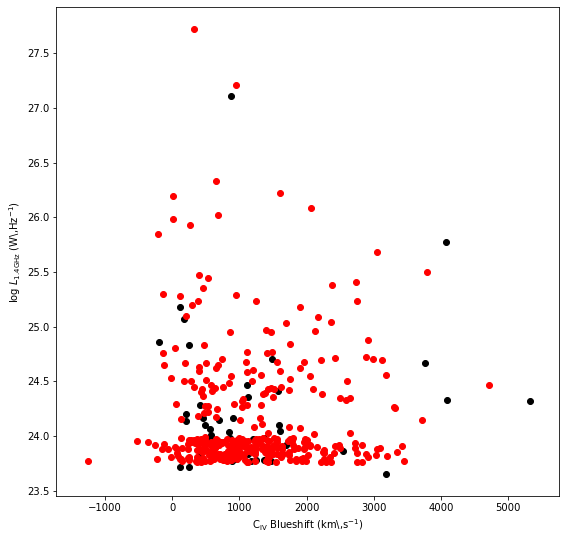

In [10]:
fig = plt.figure(figsize=(9,9))

plt.scatter(voff_vla, L14_vla, color="k", label="VLA")
plt.scatter(voff_lofar, L14_lofar, color="r", label="LOFAR")
plt.ylabel("log $L_\mathrm{1.4GHz}$ (W\,Hz$^{-1}$)")
plt.xlabel("C$_\mathrm{IV}$ Blueshift (km\,s$^{-1}$)")
plt.xlim(-1725, plt.gca().get_xlim()[1])
plt.show()

No?  at least no big difference.

Now just look at the RQ sources

In [11]:
voffRQ = voff[RQ]
L14RQ  = L14[RQ]

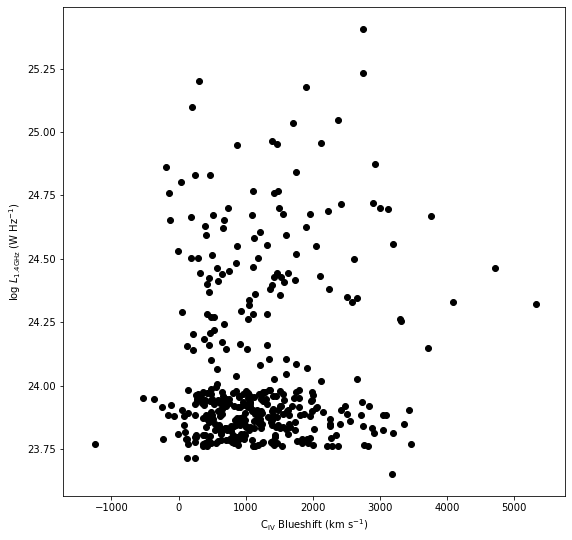

In [12]:
fig = plt.figure(figsize=(9,9))

plt.scatter(voffRQ, L14RQ, color="k")
plt.ylabel("log $L_\mathrm{1.4GHz}$ (W Hz$^{-1}$)")
plt.xlabel("C$_\mathrm{IV}$ Blueshift (km s$^{-1}$)")
plt.xlim(-1725, plt.gca().get_xlim()[1])
plt.show()

Last visualization I want to do: if the UV/X-ray anticorrelation means different origins of radio emission, there might be tighter correlations with radio in different parts of the paramter space.  That is, radio emission might be more dependent on CIV blueshift at large CIV distances.

In [13]:
vla_dist = vla["CIV_DIST_041921"] 
lof_dist = lofar["CIV_DIST_041921"]
CIVdist  = np.concatenate((vla_dist, lof_dist))
lowCIV   = (CIVdist<2.0)
midCIV   = (CIVdist>=2.0)&(CIVdist<=3.2)
highCIV  = (CIVdist>3.2)

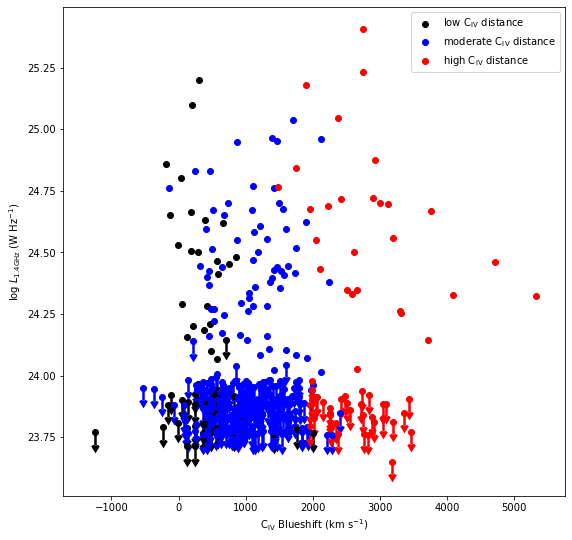

In [14]:
fig = plt.figure(figsize=(9,9))

plt.scatter(voff[RQ&lowCIV&det], L14[RQ&lowCIV&det], color="k", label="low C$_\mathrm{IV}$ distance")
plt.errorbar(voff[RQ&lowCIV&(~det)], L14[RQ&lowCIV&(~det)], color="k", fmt="o", 
             yerr=0.05, uplims=True, elinewidth=2.5, capthick=3)

plt.scatter(voff[RQ&midCIV&det], L14[RQ&midCIV&det], color="b", label="moderate C$_\mathrm{IV}$ distance")
plt.errorbar(voff[RQ&midCIV&(~det)], L14[RQ&midCIV&(~det)], color="b", fmt="o", 
             yerr=0.05, uplims=True, elinewidth=2.5, capthick=3)

plt.scatter(voff[RQ&highCIV&det], L14[RQ&highCIV&det], color="r", label="high C$_\mathrm{IV}$ distance")
plt.errorbar(voff[RQ&highCIV&(~det)], L14[RQ&highCIV&(~det)], color="r", fmt="o", 
             yerr=0.05, uplims=True, elinewidth=2.5, capthick=3)

plt.ylabel("log $L_\mathrm{1.4GHz}$ (W Hz$^{-1}$)")
plt.xlabel("C$_\mathrm{IV}$ Blueshift (km s$^{-1}$)")
plt.xlim(-1725, plt.gca().get_xlim()[1])
plt.legend(loc="best")
plt.show()

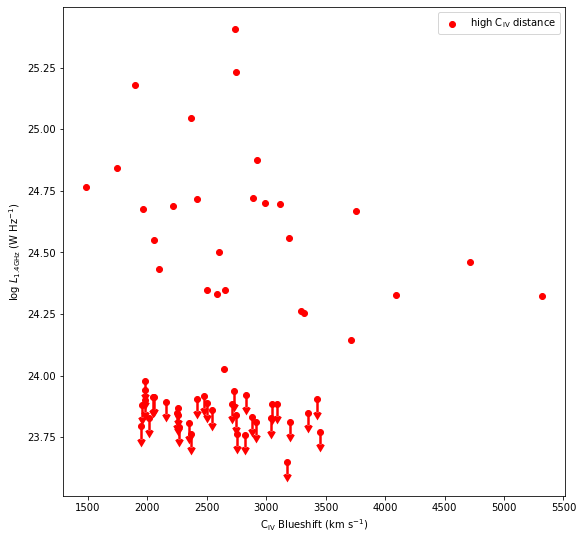

In [15]:
fig = plt.figure(figsize=(9,9))

plt.scatter(voff[RQ&highCIV&det], L14[RQ&highCIV&det], color="r", label="high C$_\mathrm{IV}$ distance")
plt.errorbar(voff[RQ&highCIV&(~det)], L14[RQ&highCIV&(~det)], color="r", fmt="o", 
             yerr=0.05, uplims=True, elinewidth=2.5, capthick=3)

plt.ylabel("log $L_\mathrm{1.4GHz}$ (W Hz$^{-1}$)")
plt.xlabel("C$_\mathrm{IV}$ Blueshift (km s$^{-1}$)")
#plt.xlim(-1725, plt.gca().get_xlim()[1])
plt.legend(loc="best")
plt.show()